In [24]:
import pandas as pd
import numpy as np
df=pd.read_csv('D:movie_metadata.csv/movie_metadata.csv')
del df['director_facebook_likes']
del df['num_critic_for_reviews']
del df['actor_1_facebook_likes']
del df['actor_2_facebook_likes']
del df['actor_3_facebook_likes']
del df['num_user_for_reviews']
del df['num_voted_users']
del df['movie_facebook_likes']
del df['movie_imdb_link']
del df['cast_total_facebook_likes']
del df['plot_keywords']
clean_data= df[df['director_name'].notnull() & df['facenumber_in_poster'].notnull()& df['color'].notnull() & df['duration'].notnull() & df['actor_2_name'].notnull() & df['genres'].notnull()
               & df['actor_1_name'].notnull() & df['actor_3_name'].notnull() & df['country'].notnull()
               & df['title_year'].notnull() & df['budget'].notnull() & df['gross'].notnull() & df['aspect_ratio'].notnull() & df['language'].notnull() & df['content_rating'].notnull()]
df=clean_data

In [29]:
usa=df['country']=='USA'
df=df[usa]

In [27]:
df = df.dropna(how='any',axis=0)

In [32]:
df['director_avg_gross']=0.0
df['director_avg_score']=0.0
df['director_movies']=0

In [33]:
import math

for index,row in df.iterrows():
    director=row['director_name']
    time=row['title_year']
    a=df['director_name']==director
    b=df['title_year']<time
    
    c=df[a & b]['gross'].aggregate(np.mean)
    d=df[a & b]['imdb_score'].aggregate(np.mean)
    e=df[a & b].shape[0]
    if math.isnan(c):
        c=0
    if math.isnan(d):
        d=0
    if math.isnan(e):
        e=0
    df.at[index,'director_avg_gross']=c
    df.at[index,'director_avg_score']=d
    df.at[index,'director_movies']=e

In [36]:
import pandas as pd
import numpy as np
import math

df['actor_average_score']=0.0
for index,row in df.iterrows():
    actor1=row['actor_1_name']
    time=row['title_year']
    a=df['actor_1_name']==actor1
    b=df['actor_2_name']==actor1
    c=df['actor_3_name']==actor1
    d=df['title_year']<time
    x=df[a & d]['imdb_score'].aggregate(np.mean)
    y=df[b & d]['imdb_score'].aggregate(np.mean)
    z=df[c & d]['imdb_score'].aggregate(np.mean)
    if math.isnan(x):
        x=0
    if math.isnan(y):
        y=0
    if math.isnan(z):
        z=0
    e=(x+y+z)/3
    if math.isnan(e):
        e=0
    actor2=row['actor_2_name']
    a=df['actor_1_name']==actor2
    b=df['actor_2_name']==actor2
    c=df['actor_3_name']==actor2
    x=df[a & d]['imdb_score'].aggregate(np.mean)
    y=df[b & d]['imdb_score'].aggregate(np.mean)
    z=df[c & d]['imdb_score'].aggregate(np.mean)
    if math.isnan(x):
        x=0
    if math.isnan(y):
        y=0
    if math.isnan(z):
        z=0
    f=(x+y+z)/3
    if math.isnan(f):
        f=0
    actor3=row['actor_3_name']
    a=df['actor_1_name']==actor3
    b=df['actor_2_name']==actor3
    c=df['actor_3_name']==actor3
    x=df[a & d]['imdb_score'].aggregate(np.mean)
    y=df[b & d]['imdb_score'].aggregate(np.mean)
    z=df[c & d]['imdb_score'].aggregate(np.mean)
    if math.isnan(x):
        x=0
    if math.isnan(y):
        y=0
    if math.isnan(z):
        z=0
    g=(x+y+z)/3
    if math.isnan(g):
        g=0
    h=(e+f+g)/3
    
    if math.isnan(h):
        h=0
    df.at[index,'actor_average_score']=h

In [39]:
df['actor_average_gross']=0.0
for index,row in df.iterrows():
    actor1=row['actor_1_name']
    time=row['title_year']
    a=df['actor_1_name']==actor1
    b=df['actor_2_name']==actor1
    c=df['actor_3_name']==actor1
    d=df['title_year']<time
    x=df[a & d]['gross'].aggregate(np.mean)
    y=df[b & d]['gross'].aggregate(np.mean)
    z=df[c & d]['gross'].aggregate(np.mean)
    if math.isnan(x):
        x=0
    if math.isnan(y):
        y=0
    if math.isnan(z):
        z=0
    e=(x+y+z)/3
    if math.isnan(e):
        e=0
    actor2=row['actor_2_name']
    a=df['actor_1_name']==actor2
    b=df['actor_2_name']==actor2
    c=df['actor_3_name']==actor2
    x=df[a & d]['gross'].aggregate(np.mean)
    y=df[b & d]['gross'].aggregate(np.mean)
    z=df[c & d]['gross'].aggregate(np.mean)
    if math.isnan(x):
        x=0
    if math.isnan(y):
        y=0
    if math.isnan(z):
        z=0
    f=(x+y+z)/3
    if math.isnan(f):
        f=0
    actor3=row['actor_3_name']
    a=df['actor_1_name']==actor3
    b=df['actor_2_name']==actor3
    c=df['actor_3_name']==actor3
    x=df[a & d]['gross'].aggregate(np.mean)
    y=df[b & d]['gross'].aggregate(np.mean)
    z=df[c & d]['gross'].aggregate(np.mean)
    if math.isnan(x):
        x=0
    if math.isnan(y):
        y=0
    if math.isnan(z):
        z=0
    g=(x+y+z)/3
    if math.isnan(g):
        g=0
    h=(e+f+g)/3
    
    if math.isnan(h):
        h=0
    df.at[index,'actor_average_gross']=h

In [41]:
df['actor_movies']=0
for index,row in df.iterrows():
    actor1=row['actor_1_name']
    time=row['title_year']
    a=df['actor_1_name']==actor1
    b=df['actor_2_name']==actor1
    c=df['actor_3_name']==actor1
    d=df['title_year']<time
    x=df[a & d].shape[0]
    y=df[b & d].shape[0]
    z=df[c & d].shape[0]
    if math.isnan(x):
        x=0
    if math.isnan(y):
        y=0
    if math.isnan(z):
        z=0    
    e=x+y+z
    if math.isnan(e):
        e=0
    actor2=row['actor_2_name']
    a=df['actor_1_name']==actor2
    b=df['actor_2_name']==actor2
    c=df['actor_3_name']==actor2
    x=df[a & d].shape[0]
    y=df[b & d].shape[0]
    z=df[c & d].shape[0]
    if math.isnan(x):
        x=0
    if math.isnan(y):
        y=0
    if math.isnan(z):
        z=0    
    f=x+y+z    
    if math.isnan(f):
        f=0
    actor3=row['actor_3_name']
    a=df['actor_1_name']==actor3
    b=df['actor_2_name']==actor3
    c=df['actor_3_name']==actor3
    x=df[a & d].shape[0]
    y=df[b & d].shape[0]
    z=df[c & d].shape[0]
    if math.isnan(x):
        x=0
    if math.isnan(y):
        y=0
    if math.isnan(z):
        z=0    
    g=x+y+z    
    if math.isnan(g):
        g=0
    h=(e+f+g)
    
    if math.isnan(h):
        h=0
    df.at[index,'actor_movies']=h

In [43]:
df.to_csv('D:Project Final/Stage2Final.csv')

In [46]:
df=pd.read_csv('D:Project Final/Stage2Final.csv',index_col=0)

In [47]:
df.isna().sum()

color                   0
director_name           0
duration                0
actor_2_name            0
gross                   0
genres                  0
actor_1_name            0
movie_title             0
actor_3_name            0
facenumber_in_poster    0
language                0
country                 0
content_rating          0
budget                  0
title_year              0
imdb_score              0
aspect_ratio            0
director_avg_gross      0
director_avg_score      0
director_movies         0
actor_average_score     0
actor_average_gross     0
actor_movies            0
dtype: int64

In [48]:
df['gross_class']=1
for index,row in df.iterrows():
    gross=row['gross']
    gross_class=1
    if gross>=1000000.0 and gross<10000000.0:
            gross_class=2
    if gross>=10000000.0 and gross<20000000.0:
            gross_class=3
    if gross>=20000000.0 and gross<40000000.0:
            gross_class=4
    if gross>=40000000.0 and gross<65000000.0:
            gross_class=5
    if gross>=65000000.0 and gross<100000000.0:
            gross_class=6
    if gross>=100000000.0 and gross<150000000.0:
            gross_class=7
    if gross>=150000000.0 and gross<200000000.0:
            gross_class=8
    if gross>=200000000.0:
            gross_class=9
    df.at[index,'gross_class']=gross_class

In [50]:

del df['country']
del df['director_name']
del df['movie_title']
del df['actor_1_name']
del df['actor_2_name']
del df['actor_3_name']

In [53]:
df.to_csv('D:Project Final/WithGrossFinal.csv')

In [55]:
del df['gross']

In [56]:
df.to_csv('D:/Project Final/WithoutGrossFinal.csv')

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('D:Project Final/WithoutGrossFinal.csv',index_col=0)

In [7]:
fd=pd.read_csv('D:Project Final/Stage2Final.csv',index_col=0)

In [10]:
df.isna().sum()

color                   0
duration                0
genres                  0
facenumber_in_poster    0
language                0
content_rating          0
budget                  0
title_year              0
imdb_score              0
aspect_ratio            0
director_avg_gross      0
director_avg_score      0
director_movies         0
actor_average_score     0
actor_average_gross     0
actor_movies            0
gross_class             0
dtype: int64

In [1]:
from __future__ import print_function

import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import linear_model, pipeline
#import category_encoders as ce


from sklearn import preprocessing
from collections import defaultdict
fd=pd.read_csv('D:Project Final/WithoutGrossFinal.csv',index_col=0)

In [2]:
s=fd['genres']
genre_num=pd.DataFrame()
k=0
for i in s:
    l=i.split('|')
    
    for j in l:
        genre_num.at[k,j]=1
    k=k+1

In [3]:
genre_num=genre_num.fillna('0')

In [4]:
del fd['genres']

In [5]:
fd=fd.reset_index(drop=True)


In [6]:
x_list_encode=fd.select_dtypes(include=['object']).copy()

In [7]:
endcode_data=pd.get_dummies(x_list_encode)

In [8]:
fd=fd.join(endcode_data)

In [9]:
fd=fd.join(genre_num)

In [10]:
del fd['color']
del fd['language']
del fd['content_rating']

In [11]:
y=fd.gross_class
X=fd.drop('gross_class',axis=1)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import tree
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [13]:
n_folds = 5

from sklearn.model_selection import KFold


# We set random_state to ensure we get the same splits every time we run this.
kf = KFold(n_splits=n_folds, random_state=1)
kf = kf.get_n_splits(X_train)

Training Random Forest...
The classifier accuracy score is 0.57
The 5-fold cross-validation accuracy score for this classifier is 0.50


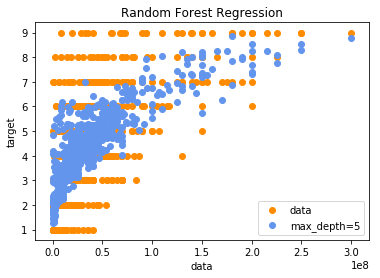

In [14]:
print ('Training Random Forest...')
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score


clf_rf = RandomForestRegressor(n_estimators=1000,max_depth=10) 
clf_rf = clf_rf.fit( X_train, y_train )
classifier_score = clf_rf.score(X_test, y_test)
print ('The classifier accuracy score is {:.2f}'.format(classifier_score))
# Get average of 3-fold cross-validation score 
score = cross_val_score(clf_rf, X_test, y_test, cv=kf)
print ('The {}-fold cross-validation accuracy score for this classifier is {:.2f}'.format(n_folds, score.mean()))

x_1=X_test['budget']

y_1 = clf_rf.predict(X_test)

plt.figure()
plt.scatter(x_1, y_test, c="darkorange", label="data")
plt.scatter(x_1, y_1, color="cornflowerblue", label="max_depth=5")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Random Forest Regression")
plt.legend()
plt.show()